In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Au_nanoparticle_dataset.csv to Au_nanoparticle_dataset.csv


In [6]:
# Load the dataset
df = pd.read_csv("Au_nanoparticle_dataset.csv")

# Filter only the required features
new_df = df[["N_total", "N_bulk", "N_surface", "R_avg"]]

In [7]:
print(new_df.head(20))

    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104


In [8]:
# 5. Calculate statistics
stats_df = pd.DataFrame({
    "Mean": new_df.mean(),
    "Standard Deviation": new_df.std(),
    "25% Quartile": new_df.quantile(0.25),
    "50% Quartile (Median)": new_df.quantile(0.5),
    "75% Quartile": new_df.quantile(0.75)
})
print("\nStatistical Summary:\n", stats_df)


Statistical Summary:
                   Mean  Standard Deviation  25% Quartile  \
N_total    3476.786500         3679.286769   1061.000000   
N_bulk     2521.550250         2976.232459    618.750000   
N_surface   955.236250          721.870220    437.000000   
R_avg        20.654363            7.610716     15.160725   

           50% Quartile (Median)  75% Quartile  
N_total               1867.00000   4503.000000  
N_bulk                1199.00000   3183.000000  
N_surface              666.00000   1301.750000  
R_avg                   18.62925     25.525125  


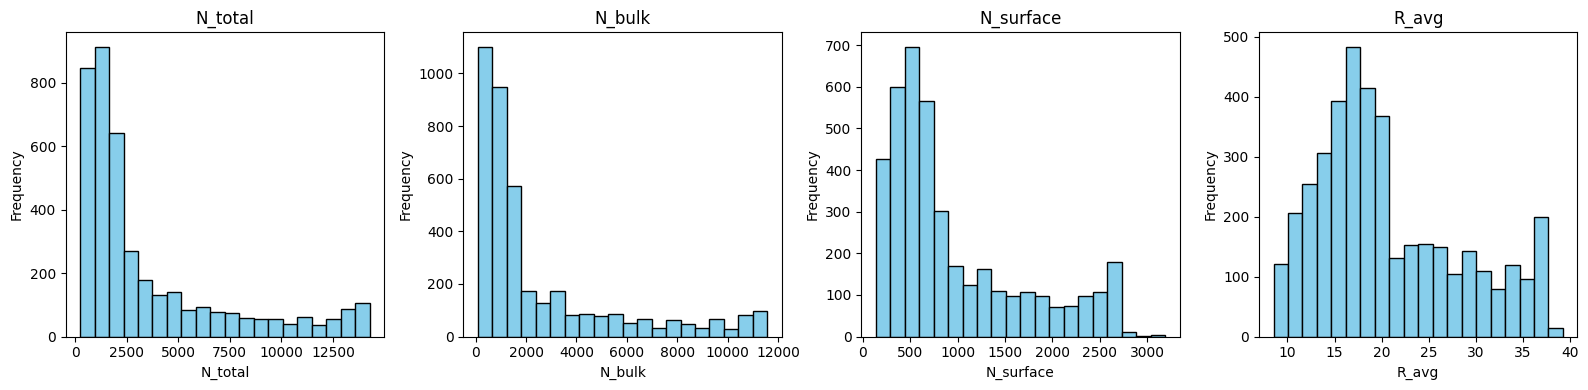

In [11]:
plt.figure(figsize=(16, 4))
for i, col in enumerate(new_df.columns):
    plt.subplot(1, 4, i+1)
    plt.hist(new_df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


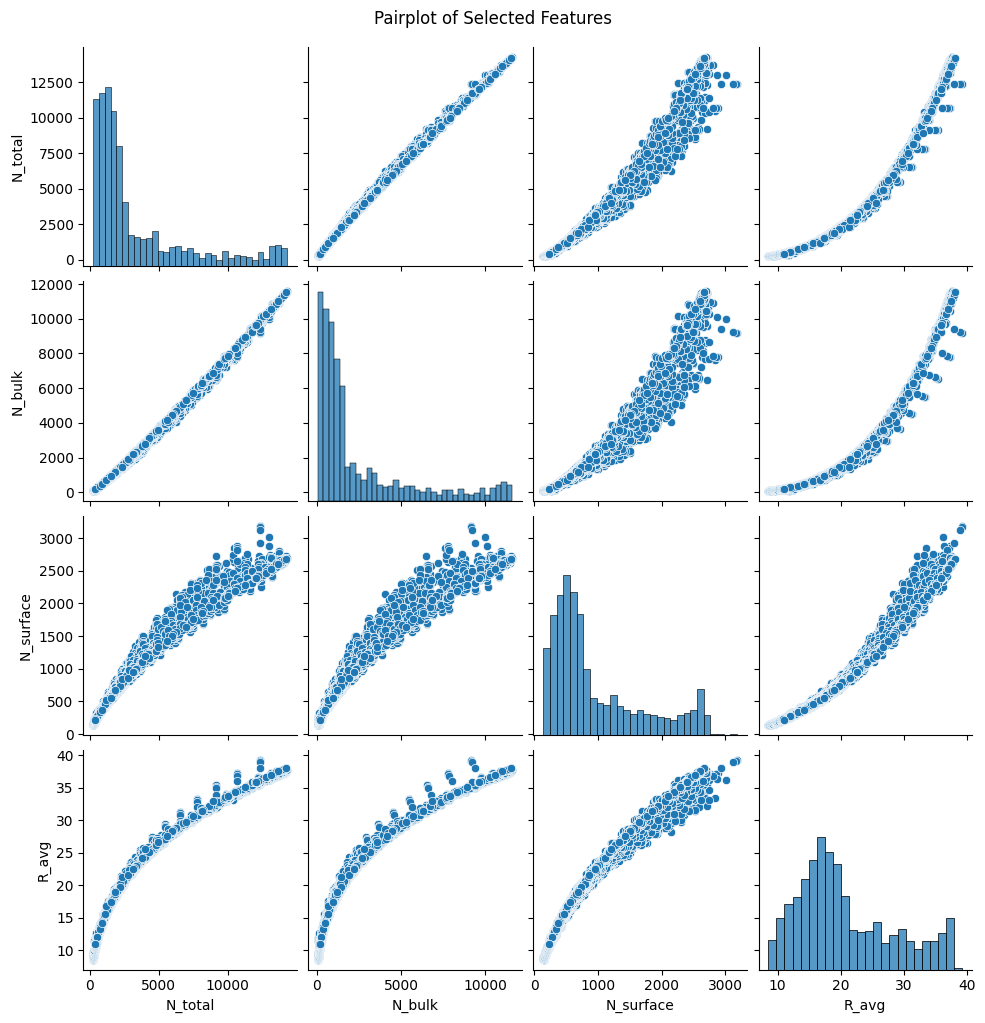

In [12]:
# 5. Pairplot of all four features
sns.pairplot(new_df)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

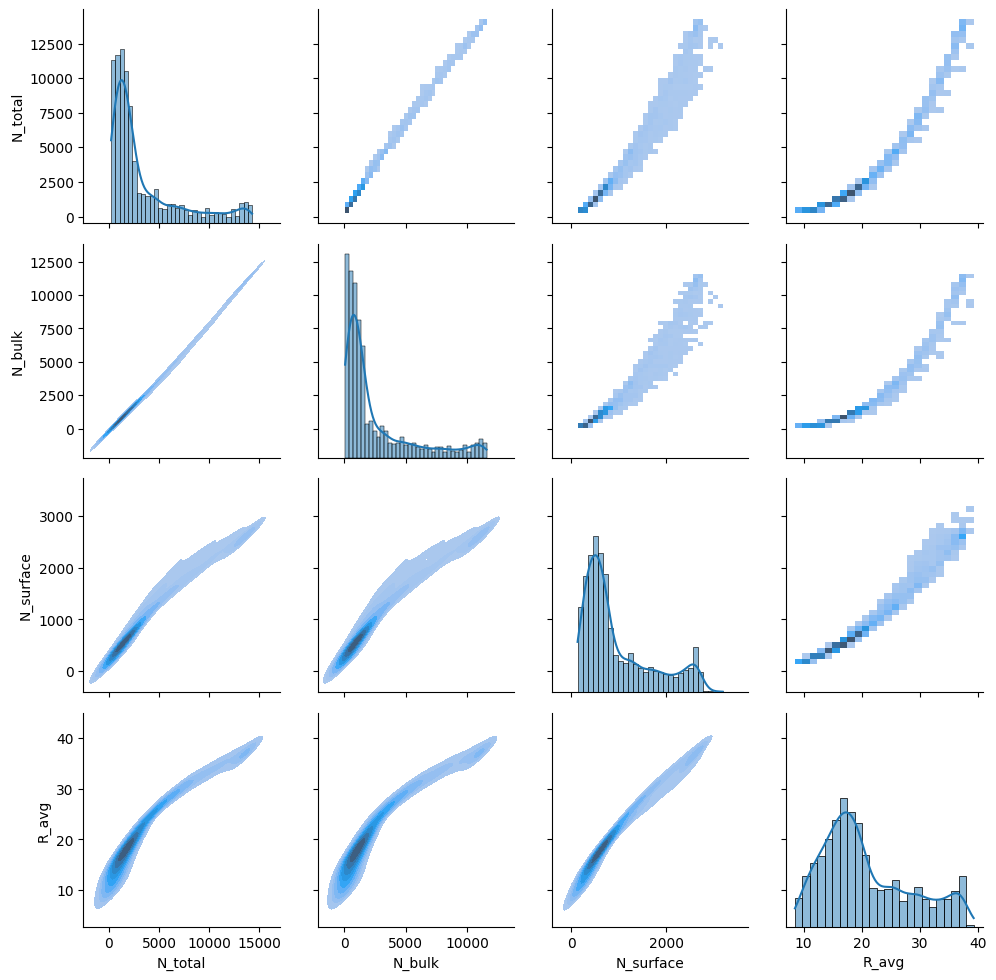

In [13]:
# 6. Custom PairGrid

# a. Upper half = bivariate histogram
# b. Diagonal = histogram + KDE
# c. Lower half = bivariate KDE
g = sns.PairGrid(new_df)

# Upper
g.map_upper(sns.histplot)

# Diagonal (hist + KDE)
g.map_diag(lambda x, **kwargs: sns.histplot(x, kde=True, **kwargs))

# Lower (2D KDE)
g.map_lower(lambda x, y, **kwargs: sns.kdeplot(x=x, y=y, fill=True, **kwargs))

plt.show()
